# Calculus - UCI Wine dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


# Load the UCI Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
df.shape

(178, 14)

## Data exploration

In [11]:
# data types of all features
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [12]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [13]:
# missing values
df.isna().sum().sum()

np.int64(0)

# Helper functions

In [14]:
def sigmoid(z):
    """Element-wise sigmoid."""
    return 1.0 / (1.0 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred, eps=1e-12):
    """
    Binary cross-entropy loss, averaged over samples.
    y_true: shape (n_samples, 1)
    y_pred: shape (n_samples, 1)
    """
    y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
    loss = -(y_true * np.log(y_pred_clipped) +
             (1 - y_true) * np.log(1 - y_pred_clipped))
    return np.mean(loss)

def forward_pass(X, W1, b1, W2, b2):
    """
    Forward pass for 2-2-1 network.

    X:  (n_samples, 2)
    W1: (2, 2)
    b1: (1, 2)
    W2: (2, 1)
    b2: scalar or shape (1,)
    """
    z1 = X @ W1 + b1          # (n, 2)
    h  = sigmoid(z1)          # (n, 2)
    z2 = h @ W2 + b2          # (n, 1)
    y_hat = sigmoid(z2)       # (n, 1)
    return z1, h, z2, y_hat

def compute_gradients(X, y, W1, b1, W2, b2):
    """
    Compute gradients of the loss w.r.t. W1, b1, W2, b2
    for one batch (all samples in X).

    X:  (n_samples, 2)
    y:  (n_samples, 1)
    """
    n = X.shape[0]

    # Forward
    z1, h, z2, y_hat = forward_pass(X, W1, b1, W2, b2)

    # Loss (for logging)
    loss = binary_cross_entropy(y, y_hat)

    # Backward
    # Output error (dL/dz2) for cross-entropy + sigmoid
    delta2 = y_hat - y                      # (n, 1)

    # Gradients for output layer
    dW2 = (h.T @ delta2) / n                # (2, 1)
    db2 = np.mean(delta2)                   # scalar

    # Hidden layer error
    delta1 = (delta2 @ W2.T) * h * (1 - h)  # (n, 2)

    # Gradients for hidden layer
    dW1 = (X.T @ delta1) / n                # (2, 2)
    db1 = np.mean(delta1, axis=0, keepdims=True)  # (1, 2)

    return dW1, db1, dW2, db2, loss

## Visualisation

X shape: (178, 2)
y shape: (178, 1)
Class distribution: [119  59]

=== Fold 1 ===
Epoch   1 | train_loss = 0.7558 | val_loss = 0.7249
Epoch  20 | train_loss = 0.6557 | val_loss = 0.6669
Epoch  40 | train_loss = 0.6291 | val_loss = 0.6597
Epoch  60 | train_loss = 0.6200 | val_loss = 0.6596
Epoch  80 | train_loss = 0.6146 | val_loss = 0.6584
Epoch 100 | train_loss = 0.6098 | val_loss = 0.6555

=== Fold 2 ===
Epoch   1 | train_loss = 0.8753 | val_loss = 0.8589
Epoch  20 | train_loss = 0.6784 | val_loss = 0.6770
Epoch  40 | train_loss = 0.6300 | val_loss = 0.6330
Epoch  60 | train_loss = 0.6151 | val_loss = 0.6200
Epoch  80 | train_loss = 0.6063 | val_loss = 0.6129
Epoch 100 | train_loss = 0.5980 | val_loss = 0.6063

=== Fold 3 ===
Epoch   1 | train_loss = 0.6772 | val_loss = 0.6616
Epoch  20 | train_loss = 0.6374 | val_loss = 0.6093
Epoch  40 | train_loss = 0.6137 | val_loss = 0.5801
Epoch  60 | train_loss = 0.5951 | val_loss = 0.5597
Epoch  80 | train_loss = 0.5781 | val_loss = 0.5426
Ep

,train_loss,val_loss
fold,,
1,0.6098,0.6555
2,0.5980,0.6063
3,0.5618,0.5270
4,0.5531,0.5359
5,0.5908,0.5839


fold,1,2,3,4,5
epoch,,,,,
1,0.7558,0.8753,0.6772,0.6167,0.7756
2,0.7462,0.8565,0.6742,0.6153,0.7643
3,0.7374,0.8389,0.6713,0.6139,0.7539
4,0.7292,0.8226,0.6686,0.6126,0.7442
5,0.7216,0.8076,0.6660,0.6114,0.7352
6,0.7145,0.7936,0.6635,0.6102,0.7269
7,0.7080,0.7806,0.6611,0.6090,0.7192
8,0.7019,0.7686,0.6588,0.6080,0.7120
9,0.6963,0.7575,0.6567,0.6069,0.7054


fold,1,2,3,4,5
epoch,,,,,
1,0.7249,0.8589,0.6616,0.6071,0.7673
2,0.7186,0.8414,0.6576,0.6058,0.7562
3,0.7128,0.8252,0.6538,0.6045,0.7459
4,0.7075,0.8101,0.6503,0.6033,0.7363
5,0.7027,0.7961,0.6468,0.6022,0.7275
6,0.6984,0.7832,0.6436,0.6011,0.7192
7,0.6944,0.7712,0.6404,0.6000,0.7115
8,0.6908,0.7601,0.6374,0.5990,0.7044
9,0.6875,0.7499,0.6346,0.5980,0.6978


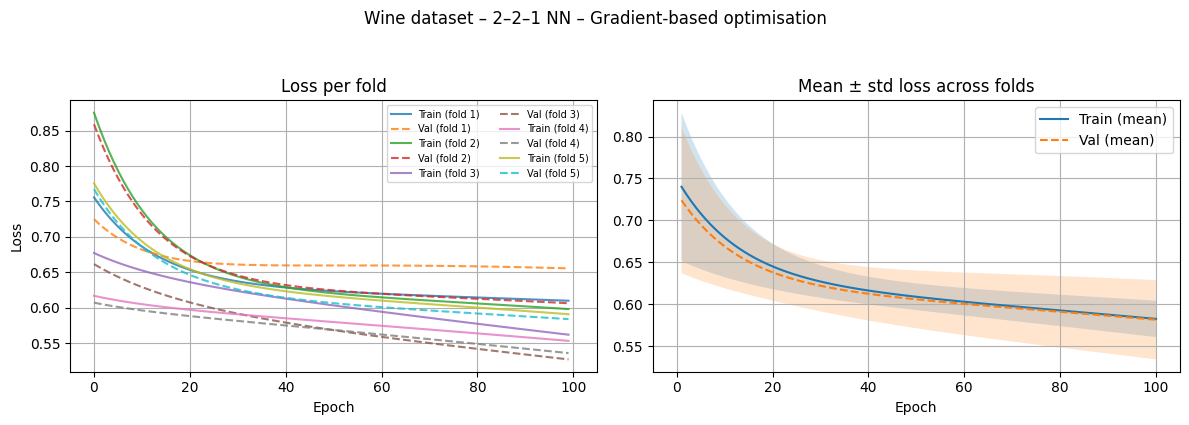

In [27]:
from IPython.display import display

wine = load_wine()
X_full = wine.data
y_full = wine.target

# Keep it int/bool for bincount
y_binary = (y_full == 0).astype(int)  # or just leave as bool: (y_full == 0)

# For consistency with the theoretical part: use only 2 features
# (alcohol and malic_acid, the first two features)
X = X_full[:, :2]           # shape (n_samples, 2)

# Convert to float *after* bincount, for use in the NN
y = y_binary.astype(np.float64).reshape(-1, 1)  # shape (n_samples, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution:", np.bincount(y_binary))

# ------------ K-fold training loop ------------

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

eta = 0.1        # learning rate
epochs = 100     # number of epochs per fold

# To store loss histories
all_train_losses = []  # list of arrays, each of shape (epochs,)
all_val_losses   = []  # list of arrays, each of shape (epochs,)

# To store detailed per-epoch data for table
records = []

fold_idx = 0

for train_index, val_index in kf.split(X):
    fold_idx += 1
    print(f"\n=== Fold {fold_idx} ===")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    n_train = X_train.shape[0]

    # Initialize parameters for this fold
    rng = np.random.default_rng(seed=fold_idx)  # different seed per fold
    W1 = rng.normal(0, 0.5, size=(2, 2))
    b1 = np.zeros((1, 2))
    W2 = rng.normal(0, 0.5, size=(2, 1))
    b2 = np.zeros((1,))

    train_losses = []
    val_losses   = []

    for epoch in range(1, epochs + 1):
        # Compute gradients on the whole training set
        dW1, db1, dW2, db2, train_loss = compute_gradients(
            X_train, y_train, W1, b1, W2, b2
        )

        # Gradient descent update
        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2

        # Compute validation loss (no gradient)
        _, _, _, y_val_hat = forward_pass(X_val, W1, b1, W2, b2)
        val_loss = binary_cross_entropy(y_val, y_val_hat)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Save record for the table
        records.append({
            "fold": fold_idx,
            "epoch": epoch,
            "train_loss": train_loss,
            "val_loss": val_loss
        })

        # (Optional) comment this out if you want less console spam
        if epoch % 20 == 0 or epoch == 1:
            print(f"Epoch {epoch:3d} | "
                  f"train_loss = {train_loss:.4f} | "
                  f"val_loss = {val_loss:.4f}")

    all_train_losses.append(np.array(train_losses))
    all_val_losses.append(np.array(val_losses))

# ------------ Table of numerical values ------------

loss_df = pd.DataFrame(records)
print("loss_df columns:", loss_df.columns.tolist())

# Summary: final train/val loss per fold (last epoch of each fold)
summary_last = (
    loss_df
    .sort_values(["fold", "epoch"])
    .groupby("fold")
    .tail(1)                   # last row per fold
    .set_index("fold")[["train_loss", "val_loss"]]  # keep only loss columns
)

# Wide pivot tables: epochs as rows, folds as columns
pivot_train = loss_df.pivot(index="epoch", columns="fold", values="train_loss")
pivot_val   = loss_df.pivot(index="epoch", columns="fold", values="val_loss")

print("Number of rows in loss_df:", len(loss_df))

# Nicely styled tables in Jupyter
display(
    summary_last.style
    .format("{:.4f}")
    .set_caption("Final train / validation loss per fold (last epoch)")
)

display(
    pivot_train.style
    .format("{:.4f}")
    .background_gradient(cmap="viridis")
    .set_caption("Train loss per epoch and fold")
)

display(
    pivot_val.style
    .format("{:.4f}")
    .background_gradient(cmap="magma")
    .set_caption("Validation loss per epoch and fold")
)

# ------------ Plotting: compact overview ------------

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# Left: training & validation loss per fold
for i in range(n_splits):
    axes[0].plot(all_train_losses[i], linestyle='-', alpha=0.8,
                 label=f"Train (fold {i+1})")
    axes[0].plot(all_val_losses[i], linestyle='--', alpha=0.8,
                 label=f"Val (fold {i+1})")

axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss per fold")
axes[0].legend(fontsize=7, ncol=2)
axes[0].grid(True)

# Right: mean ± std across folds
train_matrix = np.vstack(all_train_losses)  # (n_splits, epochs)
val_matrix   = np.vstack(all_val_losses)    # (n_splits, epochs)

epochs_range = np.arange(1, epochs + 1)

train_mean = train_matrix.mean(axis=0)
train_std  = train_matrix.std(axis=0)

val_mean = val_matrix.mean(axis=0)
val_std  = val_matrix.std(axis=0)

axes[1].plot(epochs_range, train_mean, label="Train (mean)")
axes[1].plot(epochs_range, val_mean,   label="Val (mean)", linestyle='--')

axes[1].fill_between(
    epochs_range, train_mean - train_std, train_mean + train_std,
    alpha=0.2
)
axes[1].fill_between(
    epochs_range, val_mean - val_std, val_mean + val_std,
    alpha=0.2
)

axes[1].set_xlabel("Epoch")
axes[1].set_title("Mean ± std loss across folds")
axes[1].legend()
axes[1].grid(True)

fig.suptitle("Wine dataset – 2–2–1 NN – Gradient-based optimisation", y=1.05)
plt.tight_layout()
plt.show()
